### Numpy basics

1\. Find the row, column and overall means for the following matrix:

```python
m = np.arange(12).reshape((3,4))
```

In [1]:
#Answer
import numpy as np

m = np.arange(12).reshape((3,4))

m_mean         = m.mean()
m_rmean    = m.mean(1)
m_cmean = m.mean(0)

print(m)
print('')
print('The  matrix mean is', m_mean)
print('The  matrix row´s mean are',m_rmean)
print('The  matrix column´s mean are',m_cmean)


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

The  matrix mean is 5.5
The  matrix row´s mean are [1.5 5.5 9.5]
The  matrix column´s mean are [4. 5. 6. 7.]


2\. Find the outer product of the following two vecotrs

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [2]:
#Answer
import numpy as np

u = np.array([1,3,5,7])
v = np.array([2,4,6,8])

A1 = np.outer(u,v)

A2 = np.transpose(np.asarray([[u[i]*v[j] for i in range(0, u.shape[0])] for j in range(0, u.shape[0])]))

u1 = u.reshape(4,1)
A3 = u1 * v

print('The matrix obtained using the numpy outer function is \n',A1)
print('')
print('The matrix obtained using a nested list comprehension is \n',A2)
print('')
print('The matrix obtained using numpy broadcasting is \n',A3)

The matrix obtained using the numpy outer function is 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

The matrix obtained using a nested list comprehension is 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]

The matrix obtained using numpy broadcasting is 
 [[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


3\. Create a 10 by 6 matrix of random uniform numbers. Set all rows with any entry less than 0.1 to be zero

Hint: Use the following numpy functions - np.random.random, np.any as well as Boolean indexing and the axis argument.

In [3]:
#Answer
import numpy as np

m = np.random.random((10,6))

print(m)
print('')

a  = np.where(m < 0.1)
a0 = a[0]

for i in range(len(a0)):
    m[a0[i],] = 0.

print(m)

[[0.73825455 0.55743052 0.82697922 0.22259169 0.1512456  0.95704225]
 [0.44894289 0.95465406 0.12227371 0.0454624  0.86233053 0.36012986]
 [0.50949542 0.76915718 0.10491412 0.64070926 0.5819855  0.46355741]
 [0.1527529  0.94241764 0.02247364 0.85615449 0.71430944 0.1426978 ]
 [0.55062262 0.48381863 0.48545139 0.47271816 0.36547698 0.80532503]
 [0.87579458 0.11658373 0.79320511 0.10639292 0.23457681 0.75288676]
 [0.50698029 0.74560849 0.86262804 0.23406413 0.67721599 0.2802569 ]
 [0.9839911  0.89391463 0.24575905 0.05177382 0.33667559 0.80548024]
 [0.80663516 0.02094548 0.99281371 0.17872094 0.88719387 0.58621384]
 [0.38446852 0.18752966 0.08958478 0.06074097 0.27404771 0.94323773]]

[[0.73825455 0.55743052 0.82697922 0.22259169 0.1512456  0.95704225]
 [0.         0.         0.         0.         0.         0.        ]
 [0.50949542 0.76915718 0.10491412 0.64070926 0.5819855  0.46355741]
 [0.         0.         0.         0.         0.         0.        ]
 [0.55062262 0.48381863 0.485451

In [4]:
#Answer using hint
import numpy as np

m = np.random.random((10,6))

print(m)
print('')

for i in range(len(m)):
    if np.any(m[i,]<0.1) == True:
        m[i,] = 0.
    
print(m)

[[0.47863075 0.4441973  0.80990969 0.58631347 0.44906212 0.43074676]
 [0.51371587 0.92535944 0.18634338 0.71488242 0.04335954 0.08864924]
 [0.85495548 0.85642149 0.01434329 0.0012652  0.95469178 0.78014974]
 [0.52985559 0.60512228 0.64011002 0.13405426 0.54683081 0.83048678]
 [0.34432814 0.74636013 0.86901354 0.77505424 0.24641208 0.4309201 ]
 [0.58429807 0.73683853 0.11272231 0.89585877 0.83948562 0.07317553]
 [0.88990421 0.23726362 0.51154282 0.97277273 0.73144289 0.52356276]
 [0.82652741 0.5016822  0.3798372  0.27092675 0.47404879 0.85087873]
 [0.84918086 0.01574079 0.54270825 0.69546943 0.46021556 0.91436786]
 [0.97610448 0.0607968  0.51989256 0.07035681 0.5693362  0.80116937]]

[[0.47863075 0.4441973  0.80990969 0.58631347 0.44906212 0.43074676]
 [0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.        ]
 [0.52985559 0.60512228 0.64011002 0.13405426 0.54683081 0.83048678]
 [0.34432814 0.74636013 0.869013

4\. Use np.linspace to create an array of 100 numbers between 0 and 2π (includsive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

Array of 100 numbers between 0 and 2π 
 [0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5

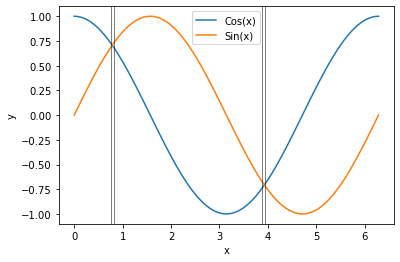

In [52]:
#Answer
import numpy as np

m = np.linspace(0,2*np.pi,100,endpoint=True)
print('Array of 100 numbers between 0 and 2π \n',m)
print('')

m_10 = m[::10]
print('Every 10th element \n',m_10)
print('')

m_reverse = m[::-1]
print('Reversed array \n',m_reverse)
print('')

m_cos = np.cos(m)
m_sin = np.sin(m)
m_dif_cs = np.abs(m_cos-m_sin)
mask = (m_dif_cs<0.1)
m_dif = m[mask]
print('Reversed array \n',m_dif)
print('')

plt.plot(m, m_cos, label ='Cos(x)')
plt.plot(m, m_sin, label ='Sin(x)')
for i in m_dif:
    plt.axvline(x=i,color ='black',linewidth = 0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

5\. Create a matrix that shows the 10 by 10 multiplication table.

 * Find the trace of the matrix
 * Extract the anto-diagonal (this should be ```array([10, 18, 24, 28, 30, 30, 28, 24, 18, 10])```)
 * Extract the diagnoal offset by 1 upwards (this should be ```array([ 2,  6, 12, 20, 30, 42, 56, 72, 90])```)

In [6]:
#Answer
import numpy as np
u = np.arange(1,11,1)
mult = np.outer(u,u)
print(mult)
print('')
trace = np.trace(mult)
print('The trace of the matrix is \n',trace)
print('')
antidiagonal = np.diag(np.fliplr(mult))
print('The anti-diagonal of the matrix is \n',antidiagonal)
print('')
dplus1 = np.diag(mult,1)
print('The diagnoal offset by 1 upwards of the matrix is \n',dplus1)

[[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]]

The trace of the matrix is 
 385

The anti-diagonal of the matrix is 
 [10 18 24 28 30 30 28 24 18 10]

The diagnoal offset by 1 upwards of the matrix is 
 [ 2  6 12 20 30 42 56 72 90]


6\. Use broadcasting to create a grid of distances

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)

In [7]:
#Answer
import numpy as np

cities_distances ={'Chicago':0, 'Springfield':198, 'Saint-Louis':303, 'Tulsa':736, 'Oklahoma City':871, 'Amarillo':1175, 'Santa Fe':1475, 'Albuquerque':1544, 'Flagstaff':1913, 'Los Angeles':2448}
cities = np.array(list(cities_distances))

distance = np.empty((cities.shape[0],cities.shape[0]))

for i in range(cities.shape[0]):
    for j in range(cities.shape[0]):
        distance[i,j] = abs(cities_distances[cities[i]]-cities_distances[cities[j]])
        
print('The distance between the cities in milles \n ',distance.astype(int))
print('')
distancekm = distance*1.61
print('The distance between the cities in km \n', distancekm.astype(int))

The distance between the cities in milles 
  [[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]

The distance between the cities in km 
 [[   0  318  487 1184 1402 1891 2374 2485 3079 3941]
 [ 318    0  169  866 1083 1572 2055 2167 2761 3622]
 [ 487  169    0  697  914 1403 1886 1998 2592 3453]
 [1184  866  697    0  217  706 1189 1300 1894 2756]
 [1402 1083  914  217    0  489  972 1083 1677 2538]
 [1891 1572 1403  706  489    0  483  594 1188 2049]
 [2374 2055 1886 1189  972  483    0  111  705 1566]
 [2485 2167 

7\. Prime numbers sieve: compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)

The prime numbers between 2 and 100 are 
 [ 2  3  5  7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89
 97]


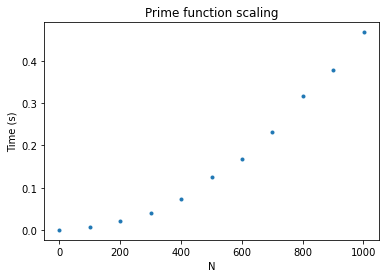

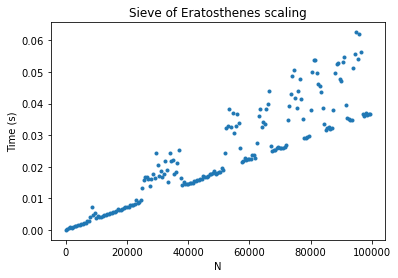

In [8]:
#Answer
import numpy as np
import  time
import matplotlib.pyplot as plt


def sieve(N):
    lst = np.arange(2,N+1)
    mask = np.ones((N-1), dtype=bool)

    for j in range(0,N-1):
        for i in range(j+1,N-1):
            if lst[i]%lst[j] == 0:
                mask[i] = False
    prime_numbers = lst[mask]
    return prime_numbers

print('The prime numbers between 2 and 100 are \n', sieve(100))

dt = 0.
ln = []
lt = []
for n in range(1,1100,100):
    start =time.time()
    sieve(n)
    ln.append(n)
    lt.append(abs(start - time.time()))
    
plt.plot(ln, lt,'.')
plt.xlabel('N')
plt.ylabel('Time (s)')
plt.title('Prime function scaling')
plt.show()

#We can see that the scaling for the first method is exponential with N.

def sieve_of_eratosthenes(N):
    mask = np.array([True for i in range(N)])
    lst = np.arange(0,N)
    
    for i in range(2,int(np.sqrt(N))):
        if mask[i] == True:
            for j in range(i**2,N,i):
                mask[j]=False
    prime_numbers_e = lst[mask]       
    return prime_numbers_e 

dt = 0.
ln = []
lt = []
for n in range(1,100000,500):
    start =time.time()
    sieve_of_eratosthenes(n)
    ln.append(n)
    lt.append(abs(start - time.time()))
    
plt.plot(ln, lt,'.')
plt.xlabel('N')
plt.ylabel('Time (s)')
plt.title('Sieve of Eratosthenes scaling')
plt.show()

#We can see that the scaling for the Eratostenes method is linear with N.

8\. Diffusion using random walk

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

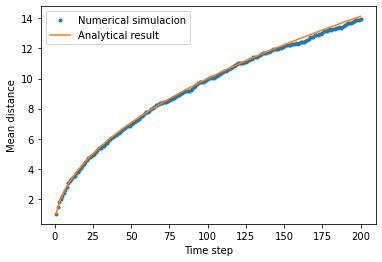

In [9]:
#Answer
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(27383)
walkers = 1000
steps   = 200

leaps = np.random.randint(0,2,size=(walkers,steps)) 
leaps = leaps*2 - 1                               #2D array of size walkers x steps with values -1 or 1

distances = np.zeros((walkers,steps))             #Distances for every walker at every time step are computed
for walker in range(0,walkers):
    distances[walker,0]=leaps[walker,0]
    for step in range(1,steps):
        distances[walker,step] = distances[walker,step-1] + leaps[walker,step]

distances = abs(distances)
mean_distance = np.mean(distances**2,axis=0)
time = np.arange(1,steps+1)
theoretical   = np.sqrt(time)

plt.plot(time,np.sqrt(mean_distance),'.',label='Numerical simulacion')
plt.plot(time,theoretical,label='Analytical result')
plt.xlabel('Time step')
plt.ylabel('Mean distance')
plt.legend()
plt.show()

9\. Analyze a data file 
  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

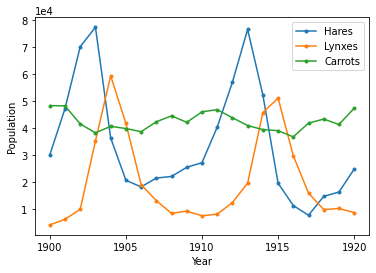

-------------------
Hares
-------------------
mean :   34080.95238095238
median :   25400.0
var :   436722494.3310658
std :   20897.906458089667
min :   7600.0
max :   77400.0
-------------------
Lynxes
-------------------
mean :   20166.666666666668
median :   12300.0
var :   264211746.031746
std :   16254.591536908763
min :   4000.0
max :   59400.0
-------------------
Carrots
-------------------
mean :   42400.0
median :   41800.0
var :   11039047.61904762
std :   3322.5062255844787
min :   36700.0
max :   48300.0

The correlation matrix is 
 [[ 1.          0.07189206 -0.01660378]
 [ 0.07189206  1.         -0.68057717]
 [-0.01660378 -0.68057717  1.        ]]


In [13]:
#Answer
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt',skiprows=0)

years   = data[:,0].astype(int)
hares   = data[:,1]
lynxes  = data[:,2]
carrots = data[:,3]

plt.plot(years,hares,'.-',label='Hares')
plt.plot(years,lynxes,'.-',label='Lynxes')
plt.plot(years,carrots,'.-',label='Carrots')
plt.xlabel('Year')
plt.ylabel('Population')
plt.ticklabel_format(axis='y', style='sci', scilimits=(4,4))
plt.locator_params(axis='x', nbins=8)        #I have to use this to avoid floats  in the xlabel (didn´t found a smarter way)
plt.legend()
plt.show()

h_mean = np.mean(hares)
h_std  = np.std(hares)
h_min  = np.min(hares)
h_max  = np.max(hares)

lebewesen  = [['Hares',hares],['Lynxes',lynxes],['Carrots',carrots]]
properties = ['mean','median','var','std','min','max']

for i in lebewesen:
    print('-------------------')
    print(i[0])
    print('-------------------')
    for j in properties:
        print(j,':  ',getattr(np, j)(i[1]))

print('')
print('The correlation matrix is', '\n', np.corrcoef(data[:,1:],rowvar=False))
